In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Creating our first function

In [13]:
def test_strategy(stock, start, end, SMA):
    df = yf.download(stock, start = start, end = end)
    data = df.Close.to_frame()
    data["returns"] = np.log(data.Close / data.Close.shift(1))
    data["SMA_S"] = data.Close.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.Close.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)

    data['Position'] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['returns']
    data.dropna(inplace=True)
    ret=np.exp(data["Strategy"].sum())
    std = data["Strategy"].std()*np.sqrt(252)
    
    return ret, std

In [14]:
test_strategy("MSFT", "2000-01-01", "2020-01-01", (50,200))

[*********************100%***********************]  1 of 1 completed


(0.39097954932295986, 0.2906766831415824)

In [15]:
test_strategy("AAPL", "2000-01-01", "2020-01-01", (50,200))

[*********************100%***********************]  1 of 1 completed


(16.540320732436786, 0.3669968290380402)

In [16]:
test_strategy("TSLA", "2000-01-01", "2020-01-01", (50,200))

[*********************100%***********************]  1 of 1 completed


(1.3908153866370587, 0.49564569049996726)

In [17]:
test_strategy("SPY", "2000-01-01", "2020-01-01", (50,200))

[*********************100%***********************]  1 of 1 completed


(4.766371508372407, 0.1878794718595858)

### Creating our first class

In [18]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.result = None
        self.get_data()
    
    def get_data(self):
        df = yf.download(self.symbol, start = self.start, end = self.end)
        data = df.Close.to_frame()
        data["returns"] = np.log(data.Close / data.Close.shift(1))
        data["SMA_S"] = data.Close.rolling(self.SMA_S).mean()
        data["SMA_L"] = data.Close.rolling(self.SMA_L).mean()
        data.dropna(inplace=True)
        self.data2 = data

        return data
    
    def test_results(self):
        data = self.data2.copy().dropna()
        data['position'] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data['strategy'] = data['position'].shift(1) * data['returns']
        data.dropna(inplace=True)
        data["returnsb&h"] = data["returns"].cumsum().apply(np.exp)
        data["returns_strategy"] = data["strategy"].cumsum().apply(np.exp)
        perf = data["returns_strategy"].iloc[-1]
        outperf = perf - data["returnsb&h"].iloc[-1]
        self.results = data

        ret = np.exp(data["strategy"].sum())
        std = data["strategy"].std()*np.sqrt(252)

        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print("Run the test please")
        else:
            title = "{}| SMA_S={} | SMA_L{}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[['returnsb&h', 'returns_strategy']].plot(title=title, figsize=(12,8))

In [19]:
tester = SMABacktester("SPY", 50, 100, "2000-01-01", "2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [20]:
tester.test_results()

(2.592726, 0.297824)

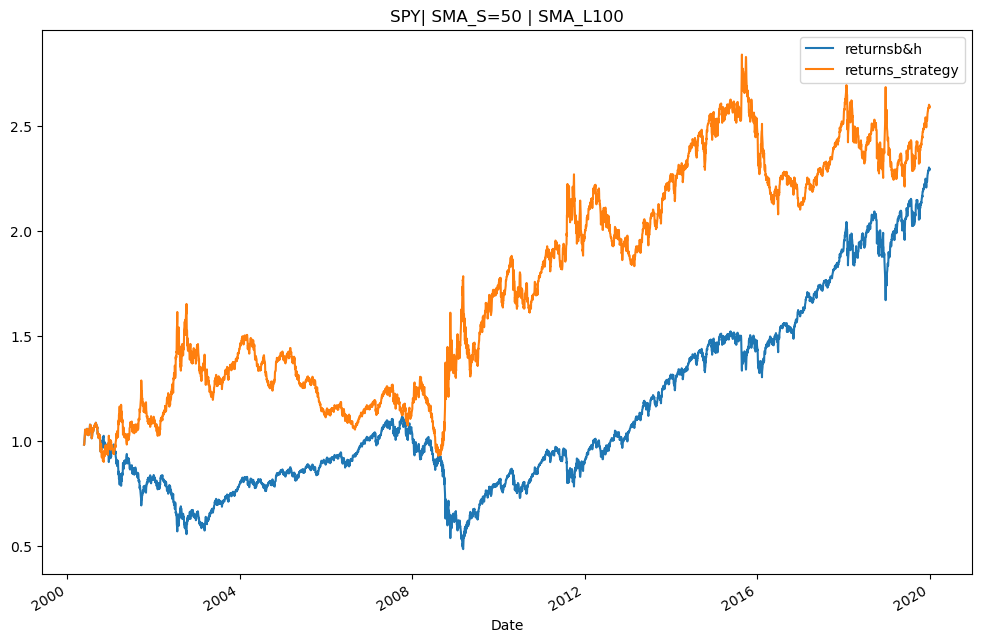

In [21]:
tester.plot_results()